#### **Usecase Summary**

In [ ]:
import pandas as pd

# Load the dataset
file_path = "er_wait_times_ontario_updated.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine both into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Display the missing values report
print("\nMissing Values Report:")
print(missing_data)

# Check if there are any missing values
if missing_values.any():
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values found in the dataset.")

           Hospital    Region        Date  Age               CTAS_Level  \
0     St. Michael's   Toronto  2024-12-14   55  CTAS I-III (Discharged)   
1  Hamilton General  Hamilton  2024-03-28   27   CTAS IV-V (Discharged)   
2        Sunnybrook   Toronto  2024-10-20   74  CTAS I-III (Discharged)   
3     St. Michael's   Toronto  2024-06-18   39  CTAS I-III (Discharged)   
4   Toronto General   Toronto  2024-05-10   53  CTAS I-III (Discharged)   

   WaitTime_Hours  ER_Occupancy DayOfWeek  Season  
0             2.0            84  Saturday  Winter  
1             1.4            97  Thursday  Spring  
2             7.6            68    Sunday    Fall  
3             2.8            73   Tuesday  Summer  
4             5.2            98    Friday  Spring  

Missing Values Report:
                Missing Values  Percentage (%)
Hospital                     0             0.0
Region                       0             0.0
Date                         0             0.0
Age                      


Summary Statistics:
                Age  WaitTime_Hours  ER_Occupancy
count  5000.000000     5000.000000   5000.000000
mean     44.761200        4.555780    104.026000
std      19.743083        5.338732     55.065733
min       0.000000        0.100000     10.000000
25%      31.000000        1.800000     56.000000
50%      45.000000        3.000000    105.000000
75%      58.000000        5.100000    152.000000
max     100.000000       76.600000    199.000000


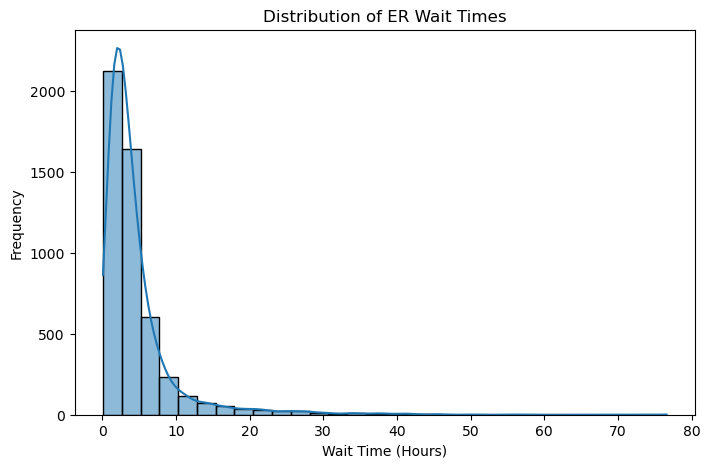

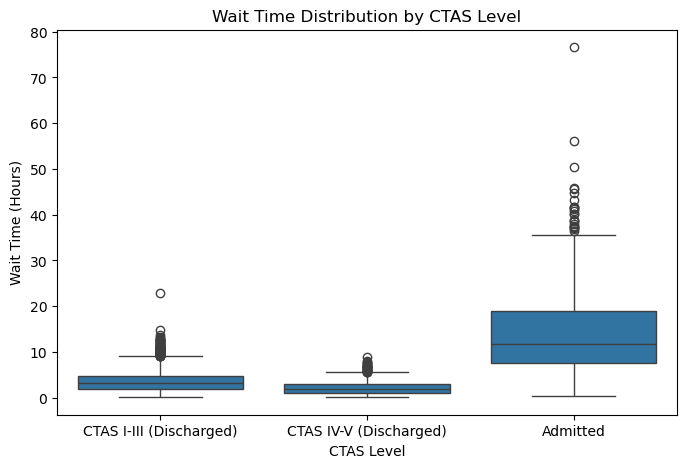

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = "er_wait_times_ontario_updated.csv"
df = pd.read_csv(file_path)

# Summary Statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)

# Histogram of Wait Times
plt.figure(figsize=(8, 5))
sns.histplot(df["WaitTime_Hours"], bins=30, kde=True)
plt.xlabel("Wait Time (Hours)")
plt.ylabel("Frequency")
plt.title("Distribution of ER Wait Times")
plt.show()

# Boxplot of Wait Times by CTAS Level
plt.figure(figsize=(8, 5))
sns.boxplot(x="CTAS_Level", y="WaitTime_Hours", data=df)
plt.xlabel("CTAS Level")
plt.ylabel("Wait Time (Hours)")
plt.title("Wait Time Distribution by CTAS Level")
plt.show()

#### **T-test Statastical Test**

In [2]:
# T-Test: Checking if there is a significant difference in wait times between CTAS I-III and CTAS IV-V
ctas_i_iii = df[df["CTAS_Level"] == "CTAS I-III (Discharged)"]["WaitTime_Hours"]
ctas_iv_v = df[df["CTAS_Level"] == "CTAS IV-V (Discharged)"]["WaitTime_Hours"]

t_stat, p_value = stats.ttest_ind(ctas_i_iii, ctas_iv_v, equal_var=False)  # Welch's t-test

# T-Test Results Display
print("\nT-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

# Hypothesis Testing
alpha = 0.05  # Significance level

print("\nHypothesis Statement:")
print("H₀ (Null Hypothesis): There is no significant difference in average ER wait times between CTAS I-III and CTAS IV-V patients.")
print("H₁ (Alternative Hypothesis): There is a significant difference in average ER wait times between CTAS I-III and CTAS IV-V patients.")

# Interpretation
if p_value < alpha:
    print("\nResult: P-value is less than 0.05, so we reject the null hypothesis (H₀).")
    print("Conclusion: There is a statistically significant difference in ER wait times between CTAS I-III and CTAS IV-V patients.")
else:
    print("\nResult: P-value is greater than 0.05, so we fail to reject the null hypothesis (H₀).")
    print("Conclusion: There is no significant difference in ER wait times between CTAS I-III and CTAS IV-V patients.")


T-Test Results:
T-Statistic: 25.3275
P-Value: 2.1990e-130

Hypothesis Statement:
H₀ (Null Hypothesis): There is no significant difference in average ER wait times between CTAS I-III and CTAS IV-V patients.
H₁ (Alternative Hypothesis): There is a significant difference in average ER wait times between CTAS I-III and CTAS IV-V patients.

Result: P-value is less than 0.05, so we reject the null hypothesis (H₀).
Conclusion: There is a statistically significant difference in ER wait times between CTAS I-III and CTAS IV-V patients.


#### **ANOVA Stastical Test**

In [3]:
# Performing ANOVA test
ctas_levels = df['CTAS_Level'].unique()
wait_time_groups = [df[df['CTAS_Level'] == level]['WaitTime_Hours'] for level in ctas_levels]
 
anova_result = stats.f_oneway(*wait_time_groups)
 
# Display ANOVA results
print("\nANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")
 
# Interpretation
alpha = 0.05
if anova_result.pvalue < alpha:
    print("\nConclusion: There is a statistically significant difference in wait times across CTAS levels.")
else:
    print("\nConclusion: No significant difference in wait times across CTAS levels.")


ANOVA Test Results:
F-statistic: 2263.0866, p-value: 0.0000

Conclusion: There is a statistically significant difference in wait times across CTAS levels.


#### **Chi-Square Statastical Test**

In [7]:
import numpy as np

# Define bins and labels
bins = [0, 3, 6, np.inf]  # Bins: Short (<3 hrs), Medium (3-6 hrs), Long (>6 hrs)
labels = ["Short", "Medium", "Long"]
 
# Create a new categorical column for wait time
data["WaitTime_Category"] = pd.cut(data["WaitTime_Hours"], bins=bins, labels=labels)
 
# Display the DataFrame
print(data)
 
 
# Step 1: Create a contingency table for Region vs. CTAS Level
contingency_table = pd.crosstab(data["Region"], data["CTAS_Level"])
 
 
# Step 2: Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
 
# Step 3: Print Results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
 
 
# Step 4: Interpret the Results
alpha = 0.05  # Significance level
 
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). The distribution of CTAS levels varies across regions.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). No significant relationship between CTAS level and region.")

                  Hospital       Region        Date  Age  \
0            St. Michael's      Toronto  2024-12-14   55   
1         Hamilton General     Hamilton  2024-03-28   27   
2               Sunnybrook      Toronto  2024-10-20   74   
3            St. Michael's      Toronto  2024-06-18   39   
4          Toronto General      Toronto  2024-05-10   53   
...                    ...          ...         ...  ...   
4995      Kingston General     Kingston  2024-08-04   74   
4996  Thunder Bay Regional  Thunder Bay  2024-12-30   31   
4997          Ottawa Civic       Ottawa  2024-02-28   56   
4998      Kingston General     Kingston  2024-11-01   49   
4999  Thunder Bay Regional  Thunder Bay  2024-11-06   48   

                   CTAS_Level  WaitTime_Hours  ER_Occupancy  DayOfWeek  \
0     CTAS I-III (Discharged)             2.0            84   Saturday   
1      CTAS IV-V (Discharged)             1.4            97   Thursday   
2     CTAS I-III (Discharged)             7.6            